<a href="https://colab.research.google.com/github/SL6I/MLProject/blob/main/Linear_Reggression_House_pricing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [80]:
import pandas as pd
import  numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [81]:
data = pd.read_csv('housing.csv')

In [82]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [83]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [84]:
data.dropna(inplace=True) # Drop the null rows

In [85]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [86]:
from sklearn.model_selection import train_test_split

X = data.drop(['median_house_value'],axis = 1)
y = data[
    'median_house_value'
]



In [87]:
X_train,X_test, y_train, y_test = train_test_split(X,y ,test_size=0.2)

In [88]:
train_data = X_train.join(y_train)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

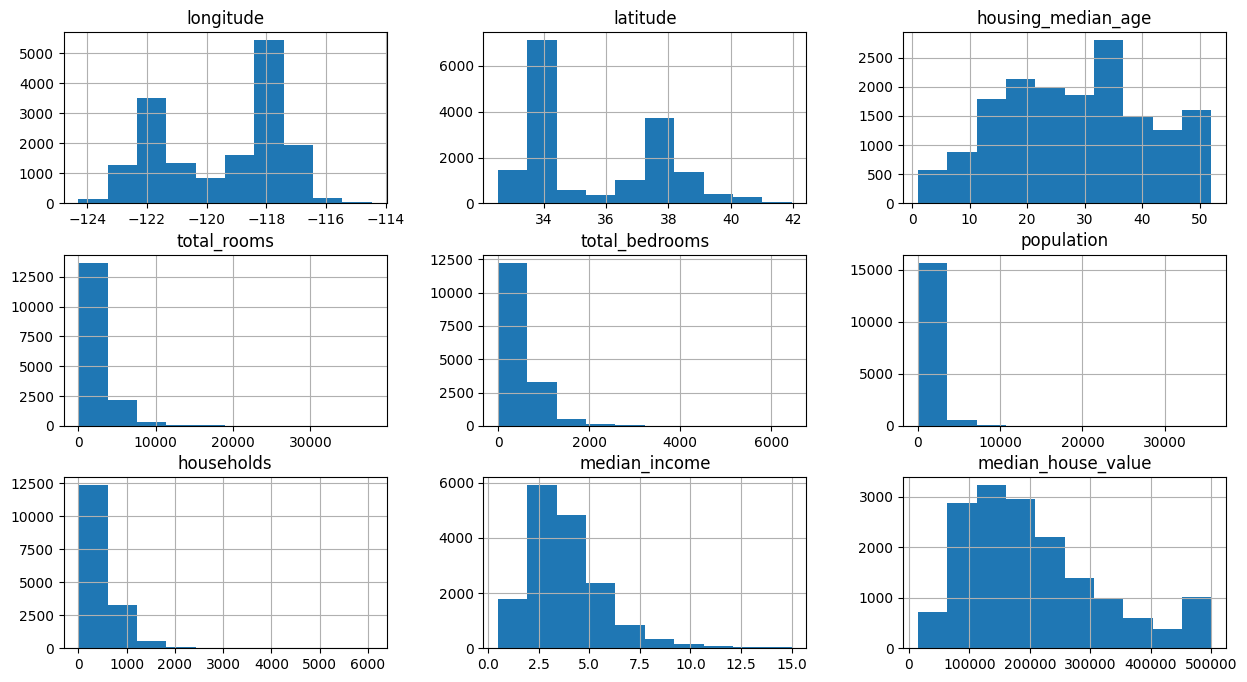

In [89]:
train_data.hist(figsize=(15,8))

In [90]:
train_data.corr()

<ipython-input-90-8d2cc80a8830>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  train_data.corr()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924590,-0.113854,0.046652,0.069762,0.097801,0.055795,-0.009977,-0.040258
latitude,-0.924590,1.000000,0.015892,-0.037544,-0.067002,-0.105813,-0.070611,-0.084151,-0.148848
housing_median_age,-0.113854,0.015892,1.000000,-0.362267,-0.323083,-0.296148,-0.305018,-0.117941,0.112008
total_rooms,0.046652,-0.037544,-0.362267,1.000000,0.931416,0.856996,0.920818,0.197728,0.132108
total_bedrooms,0.069762,-0.067002,-0.323083,0.931416,1.000000,0.876061,0.980017,-0.006561,0.049896
population,0.097801,-0.105813,-0.296148,0.856996,0.876061,1.000000,0.905264,0.006316,-0.025801
households,0.055795,-0.070611,-0.305018,0.920818,0.980017,0.905264,1.000000,0.014680,0.064695
median_income,-0.009977,-0.084151,-0.117941,0.197728,-0.006561,0.006316,0.014680,1.000000,0.684009
median_house_value,-0.040258,-0.148848,0.112008,0.132108,0.049896,-0.025801,0.064695,0.684009,1.000000


<ipython-input-91-b4adc3bca8ac>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train_data.corr(),annot = True,cmap = 'YlGnBu')


<Axes: >

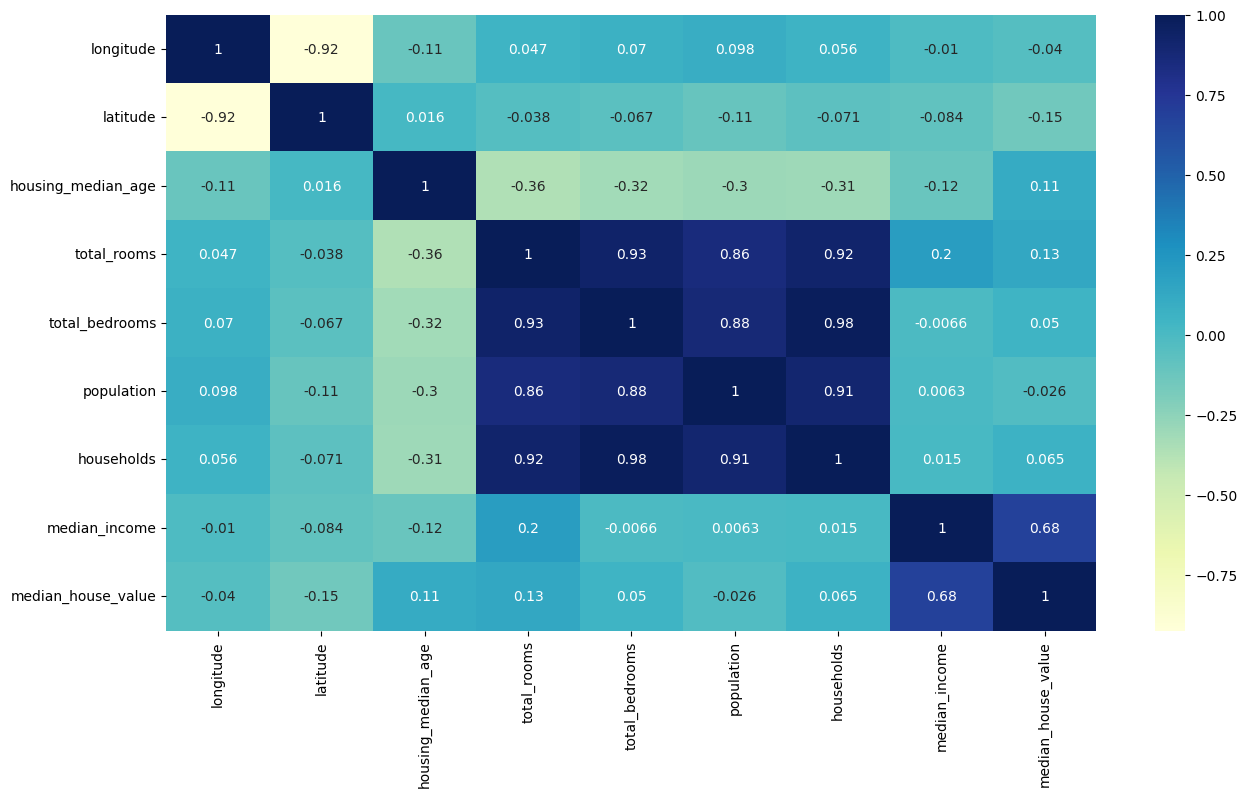

In [91]:

plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(),annot = True,cmap = 'YlGnBu')

In [92]:
train_data['total_rooms'] = np.log(train_data['total_rooms']+1)
train_data['total_bedrooms'] = np.log(train_data['total_bedrooms']+1)
train_data['population'] = np.log(train_data['population']+1)
train_data['households'] = np.log(train_data['households']+1)


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

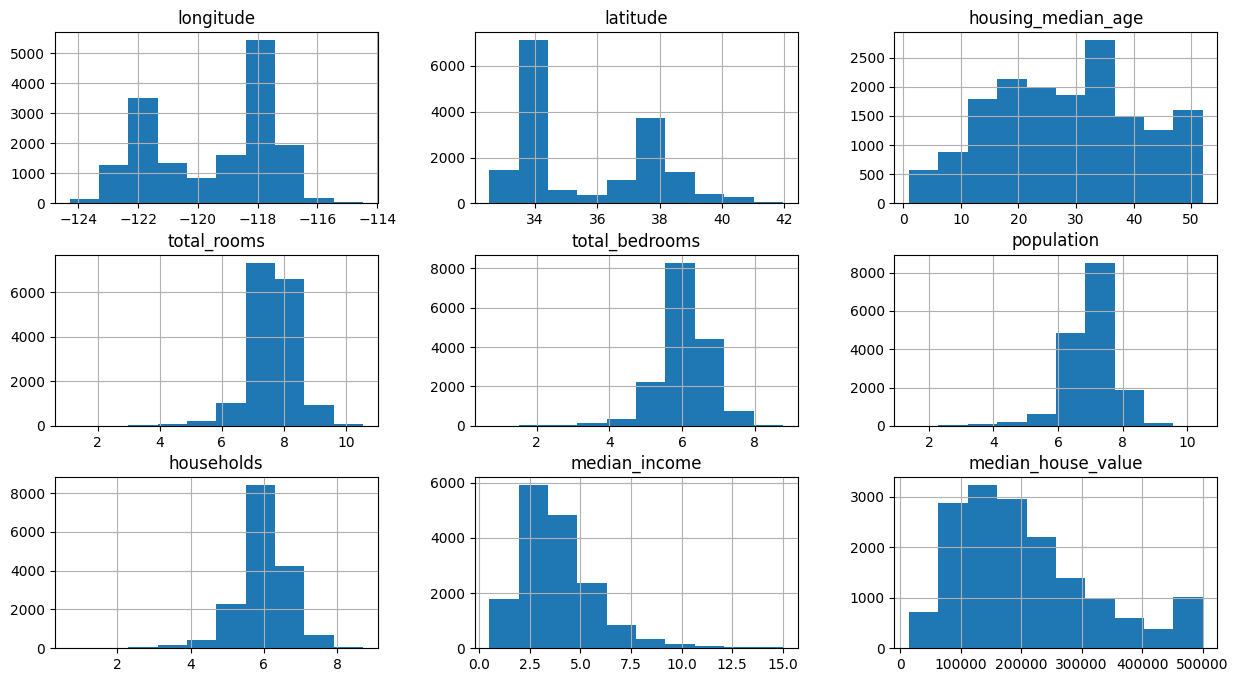

In [93]:
train_data.hist(figsize=(15,8))

**# Data Preprocessing**

In [94]:
train_data['ocean_proximity'].value_counts()

<1H OCEAN     7248
INLAND        5155
NEAR OCEAN    2117
NEAR BAY      1821
ISLAND           5
Name: ocean_proximity, dtype: int64

In [95]:
train_data = train_data.join(pd.get_dummies(train_data['ocean_proximity'])).drop(['ocean_proximity'],axis = 1)

<Axes: >

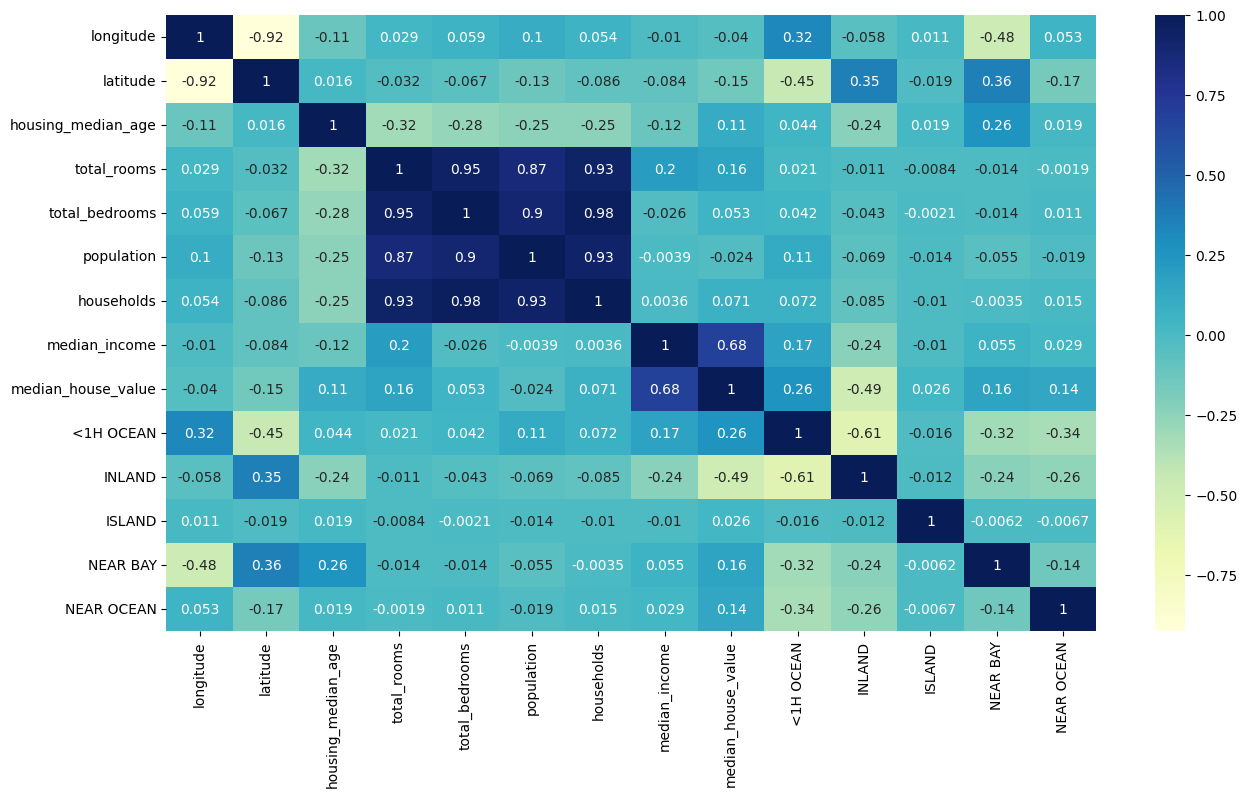

In [96]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(),annot = True,cmap = 'YlGnBu')

<Axes: xlabel='latitude', ylabel='longitude'>

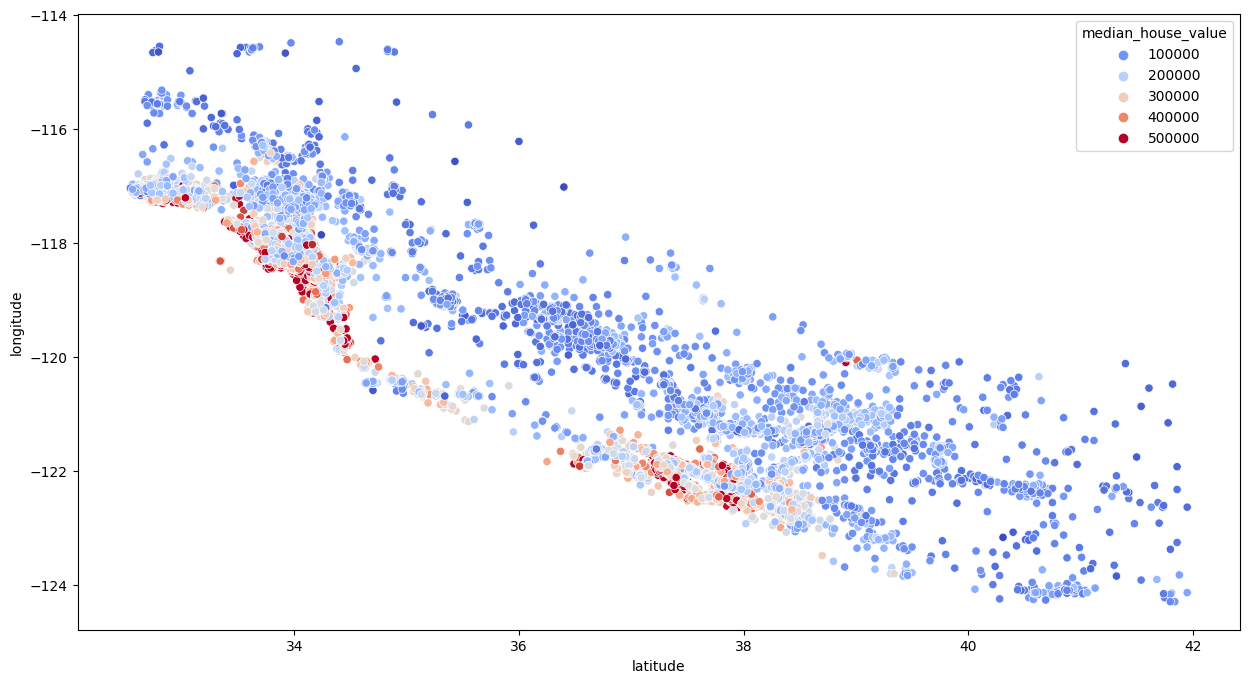

In [97]:
plt.figure(figsize=(15,8))
sns.scatterplot(x = 'latitude', y = 'longitude',data = train_data,hue='median_house_value',palette = 'coolwarm')

In [98]:
train_data['Ratio_Bedrooms'] = train_data['total_bedrooms'] / train_data['total_rooms']

train_data['house_rooms'] = train_data['total_rooms'] / train_data['households']



<Axes: >

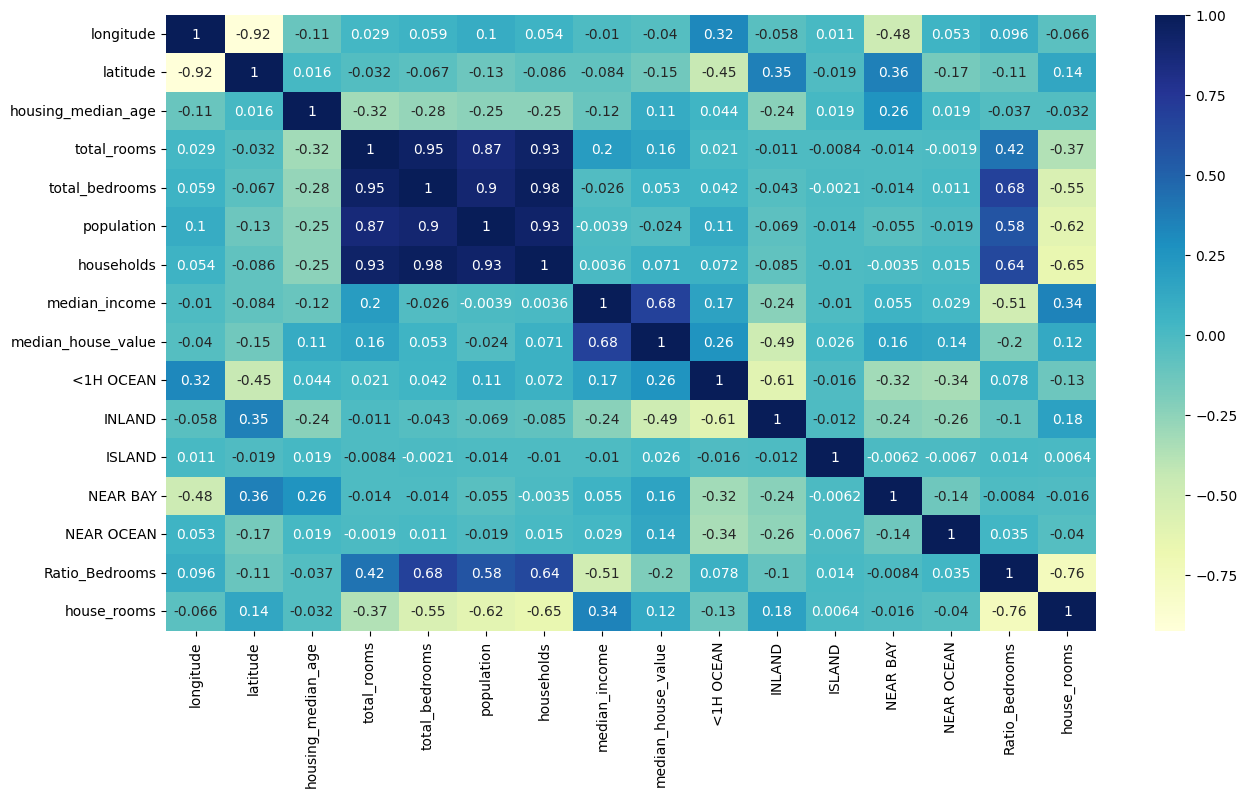

In [99]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(),annot = True,cmap = 'YlGnBu')

In [100]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

scalar = StandardScaler()


X_train,y_train = train_data.drop(['median_house_value'],axis = 1), train_data['median_house_value']
X_trainS = scalar.fit_transform(X_train)
reg = LinearRegression()

reg.fit(X_trainS,y_train) # 3lmnah


LinearRegression()

In [101]:
test_data = X_test.join(y_test)

test_data['total_rooms'] = np.log(test_data['total_rooms']+1)
test_data['total_bedrooms'] = np.log(test_data['total_bedrooms']+1)
test_data['population'] = np.log(test_data['population']+1)
test_data['households'] = np.log(test_data['households']+1)

test_data = test_data.join(pd.get_dummies(test_data['ocean_proximity'])).drop(['ocean_proximity'],axis = 1)

test_data['Ratio_Bedrooms'] = test_data['total_bedrooms'] / test_data['total_rooms']

test_data['house_rooms'] = test_data['total_rooms'] / test_data['households']




In [102]:
X_test,y_test = test_data.drop(['median_house_value'],axis = 1), test_data['median_house_value']

In [103]:
X_testS = scalar.fit_transform(X_test)

In [105]:
reg.score(X_testS, y_test)

ValueError: X has 14 features, but LinearRegression is expecting 15 features as input.